<a href="https://colab.research.google.com/github/slupok/DataMining/blob/main/first_tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('/content/Car_sales.csv', sep=',')
df.drop(['Model', 'Manufacturer', '__year_resale_value', 'Price_in_thousands', 'Wheelbase', 'Curb_weight', 'Latest_Launch', 'Power_perf_factor'], axis=1, inplace=True)
df.head()

,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Width,Length,Fuel_capacity,Fuel_efficiency
0,16.919,Passenger,1.8,140.0,67.3,172.4,13.2,28.0
1,39.384,Passenger,3.2,225.0,70.3,192.9,17.2,25.0
2,14.114,Passenger,3.2,225.0,70.6,192.0,17.2,26.0
3,8.588,Passenger,3.5,210.0,71.4,196.6,18.0,22.0
4,20.397,Passenger,1.8,150.0,68.2,178.0,16.4,27.0


In [38]:
# дозаполняем числовые столбцы с пропусками медианными значениями
df['Engine_size'].fillna(df['Engine_size'].median(), inplace=True)
df['Horsepower'].fillna(df['Horsepower'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)
df['Length'].fillna(df['Length'].median(), inplace=True)
df['Fuel_capacity'].fillna(df['Fuel_capacity'].median(), inplace=True)
df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].median(), inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales_in_thousands  157 non-null    float64
 1   Vehicle_type        157 non-null    object 
 2   Engine_size         157 non-null    float64
 3   Horsepower          157 non-null    float64
 4   Width               157 non-null    float64
 5   Length              157 non-null    float64
 6   Fuel_capacity       157 non-null    float64
 7   Fuel_efficiency     157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [40]:
num_cols=['Sales_in_thousands',	'Engine_size', 'Horsepower', 'Width', 'Length', 'Fuel_capacity','Fuel_efficiency']
target_col=['Vehicle_type']

In [41]:
print(df.info())
df['Vehicle_type']=pd.factorize(df['Vehicle_type'])[0]
X=df[num_cols]
y=df[target_col]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales_in_thousands  157 non-null    float64
 1   Vehicle_type        157 non-null    object 
 2   Engine_size         157 non-null    float64
 3   Horsepower          157 non-null    float64
 4   Width               157 non-null    float64
 5   Length              157 non-null    float64
 6   Fuel_capacity       157 non-null    float64
 7   Fuel_efficiency     157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB
None


In [42]:
X.corr()
y.value_counts()

Vehicle_type
0               116
1                41
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model=DecisionTreeClassifier(max_depth=5,random_state=21)
modelForest=RandomForestClassifier(n_estimators=5000,max_depth=50)

model.fit(X_train,y_train)
modelForest.fit(X_train,y_train)

y_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
y_predForest=modelForest.predict(X_test)


f1_score(y_test,y_predForest, average='weighted')

0.9680272108843537

In [46]:
from sklearn.model_selection import cross_validate
cv_res=cross_validate(modelForest,X,y,cv=10)
print(cv_res['test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[0.9375     1.         1.         0.9375     0.9375     0.9375
 0.9375     1.         0.93333333 0.86666667]


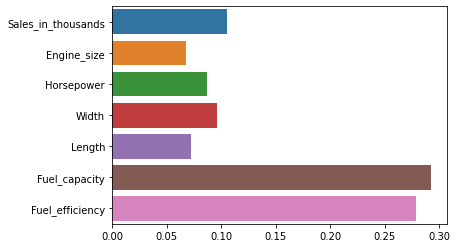

In [47]:
import seaborn as sns
sns.barplot(x=modelForest.feature_importances_,y=X_test.columns)

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
modelGradSklearn=GradientBoostingClassifier(n_estimators=120,max_depth=4,random_state=21)
modelGradSklearn.fit(X_train,y_train)
y_pred_Grad_sk=modelGradSklearn.predict(X_test)
f1_score(y_test,y_pred_Grad_sk, average='weighted')

0.9040816326530612

In [50]:
import xgboost as xgb
modelGradXGB=xgb.XGBClassifier(n_estimators=80,max_depth=4,random_state=21)
modelGradXGB.fit(X_train,y_train)
y_pred_Grad_XGB=modelGradXGB.predict(X_test)
f1_score(y_test,y_pred_Grad_XGB, average='weighted')

0.9375

In [52]:
!pip install catboost


In [53]:
import catboost
X_trainCB,X_testCB,y_trainCB,y_testCB=train_test_split(df[num_cols],df[target_col],test_size=0.2,random_state=21)

In [54]:
modelGradCB=catboost.CatBoostClassifier(n_estimators=120,max_depth=4,random_state=21)
modelGradCB.fit(X_train,y_train)
y_pred_Grad_CB=modelGradXGB.predict(X_test)
f1_score(y_test,y_pred_Grad_XGB, average='weighted')

Learning rate set to 0.029628
0:	learn: 0.6796771	total: 47.3ms	remaining: 5.62s
1:	learn: 0.6674095	total: 47.8ms	remaining: 2.82s
2:	learn: 0.6581713	total: 48.3ms	remaining: 1.88s
3:	learn: 0.6491104	total: 48.6ms	remaining: 1.41s
4:	learn: 0.6376233	total: 49.2ms	remaining: 1.13s
5:	learn: 0.6282170	total: 49.8ms	remaining: 946ms
6:	learn: 0.6176015	total: 50.5ms	remaining: 815ms
7:	learn: 0.6070821	total: 51ms	remaining: 715ms
8:	learn: 0.5974917	total: 51.7ms	remaining: 637ms
9:	learn: 0.5887561	total: 52.3ms	remaining: 575ms
10:	learn: 0.5805431	total: 54.8ms	remaining: 543ms
11:	learn: 0.5726844	total: 56.5ms	remaining: 509ms
12:	learn: 0.5647386	total: 57.3ms	remaining: 472ms
13:	learn: 0.5570519	total: 58.3ms	remaining: 442ms
14:	learn: 0.5493145	total: 62.9ms	remaining: 440ms
15:	learn: 0.5412592	total: 63.5ms	remaining: 413ms
16:	learn: 0.5334104	total: 64.1ms	remaining: 388ms
17:	learn: 0.5263741	total: 64.6ms	remaining: 366ms
18:	learn: 0.5208322	total: 65.1ms	remaining: 

0.9375